In [1]:
import pandas as pd

# Loading the clustering results data

hierarchy_results = pd.read_csv('/Users/yangfanzhou/Desktop/1.8/ClusterResult/cluster_result_hierarchy.csv')
dbscan_results = pd.read_csv('/Users/yangfanzhou/Desktop/1.8/ClusterResult/cluster_result_dbscan.csv')

# View the first few rows of the data
print(hierarchy_results.head())
print(dbscan_results.head())


     ID  Label  SpeedChange  AngleChange     Speed  Cluster
0  57.0    6.0    -0.035897   153.434949  0.044632        2
1  57.0    6.0     0.055368   156.037511  0.100000        2
2  57.0    6.0     0.092361    40.276341  0.192361        2
3  57.0    6.0     0.660334    43.941266  0.852695        2
4  57.0    6.0    -0.694921     3.179830  0.157774        2
     ID  Label  SpeedChange  AngleChange     Speed  Cluster
0  57.0    6.0    -0.035897   153.434949  0.044632        0
1  57.0    6.0     0.055368   156.037511  0.100000        0
2  57.0    6.0     0.092361    40.276341  0.192361        0
3  57.0    6.0     0.660334    43.941266  0.852695        0
4  57.0    6.0    -0.694921     3.179830  0.157774        0


In [5]:
# Calculate the average eigenvalue for each cluster
hierarchy_summary = hierarchy_results.groupby('Cluster').mean()
dbscan_summary = dbscan_results.groupby('Cluster').mean()

print(hierarchy_summary)
print(dbscan_summary)


                 ID      Label  SpeedChange  AngleChange     Speed
Cluster                                                           
1        117.178365  10.655656     0.001699    53.988053  0.154857
2        114.360073  11.915852     0.003059    44.428203  0.184725
                 ID      Label  SpeedChange  AngleChange     Speed
Cluster                                                           
-1       118.216783  10.573427     0.001248    74.726726  0.203533
 0       115.014017  11.610955     0.002741    46.083788  0.175844


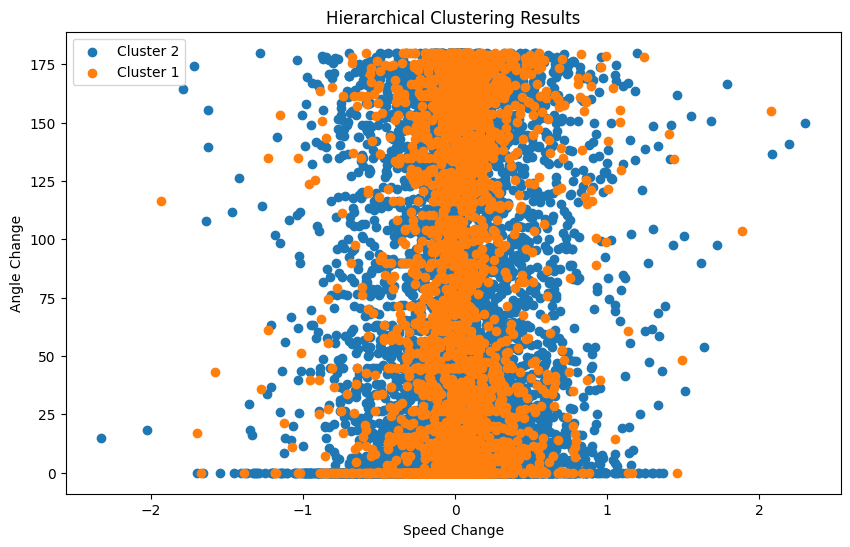

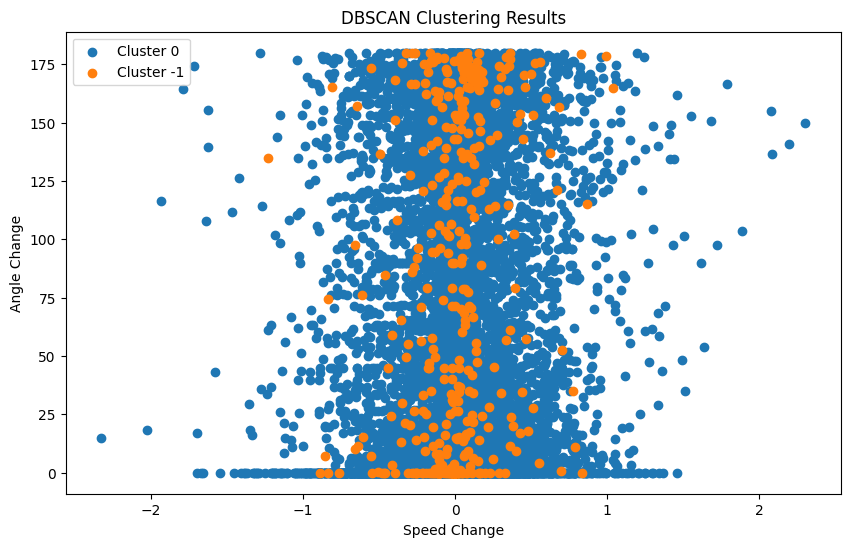

In [6]:
import matplotlib.pyplot as plt

# Plotting the distribution of clustering results
def plot_cluster_results(data, title):
    plt.figure(figsize=(10, 6))
    for cluster in data['Cluster'].unique():
        subset = data[data['Cluster'] == cluster]
        plt.scatter(subset['SpeedChange'], subset['AngleChange'], label=f'Cluster {cluster}')
    
    plt.title(title)
    plt.xlabel('Speed Change')
    plt.ylabel('Angle Change')
    plt.legend()
    plt.show()

# Plotting hierarchical clustering and DBSCAN clustering results
plot_cluster_results(hierarchy_results, 'Hierarchical Clustering Results')
plot_cluster_results(dbscan_results, 'DBSCAN Clustering Results')


In [7]:
from sklearn.metrics import adjusted_rand_score

# Comparing the results of two clustering methods
ari_score = adjusted_rand_score(hierarchy_results['Cluster'], dbscan_results['Cluster'])
print(f'Adjusted Rand Index between Hierarchical Clustering and DBSCAN: {ari_score}')


Adjusted Rand Index between Hierarchical Clustering and DBSCAN: 0.10988475459077478


In [8]:
# Calculate the basic statistical characteristics of each cluster
cluster_1_stats = hierarchy_results[hierarchy_results['Cluster'] == 1].describe()
cluster_2_stats = hierarchy_results[hierarchy_results['Cluster'] == 2].describe()

print("Cluster 1 Statistics:")
print(cluster_1_stats)
print("\nCluster 2 Statistics:")
print(cluster_2_stats)


Cluster 1 Statistics:
                ID        Label  SpeedChange  AngleChange        Speed  \
count  3633.000000  3633.000000  3633.000000  3633.000000  3633.000000   
mean    117.178365    10.655656     0.001699    53.988053     0.154857   
std      50.267792     6.182793     0.267093    64.851989     0.214922   
min      30.000000     2.000000    -1.934844     0.000000     0.000000   
25%      62.000000     6.000000    -0.087162     0.000000     0.000000   
50%     142.000000    10.000000     0.000000    15.802514     0.080000   
75%     163.000000    15.000000     0.087565   116.565051     0.215471   
max     182.000000    36.000000     2.076889   180.000000     2.202103   

       Cluster  
count   3633.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  

Cluster 2 Statistics:
                ID        Label  SpeedChange  AngleChange        Speed  \
count  9923.000000  9923.000000  9923.000000  9923.000000  99

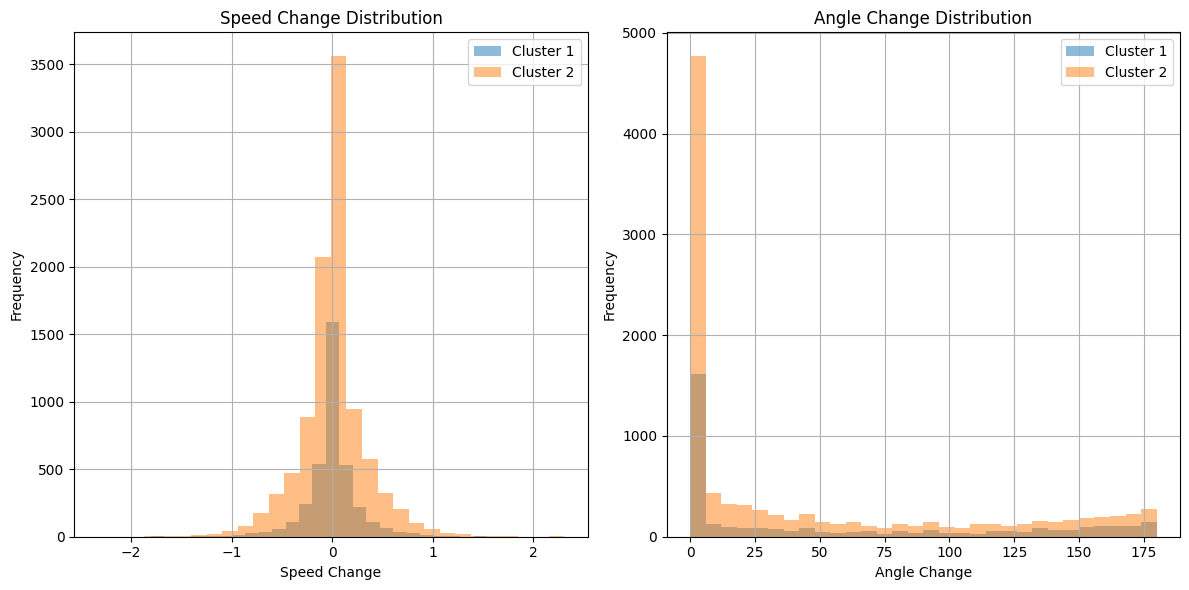

In [9]:
import matplotlib.pyplot as plt

# Plotting the distribution of velocity changes and direction changes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
hierarchy_results[hierarchy_results['Cluster'] == 1]['SpeedChange'].hist(alpha=0.5, bins=30, label='Cluster 1')
hierarchy_results[hierarchy_results['Cluster'] == 2]['SpeedChange'].hist(alpha=0.5, bins=30, label='Cluster 2')
plt.title('Speed Change Distribution')
plt.xlabel('Speed Change')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
hierarchy_results[hierarchy_results['Cluster'] == 1]['AngleChange'].hist(alpha=0.5, bins=30, label='Cluster 1')
hierarchy_results[hierarchy_results['Cluster'] == 2]['AngleChange'].hist(alpha=0.5, bins=30, label='Cluster 2')
plt.title('Angle Change Distribution')
plt.xlabel('Angle Change')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# Filtering out data from Cluster 0 and Cluster -1
cluster_0 = dbscan_results[dbscan_results['Cluster'] == 0]
cluster_1 = dbscan_results[dbscan_results['Cluster'] == -1]

# Filtering out data from Cluster 0 and Cluster -1
cluster_0 = dbscan_results[dbscan_results['Cluster'] == 0]
cluster_1 = dbscan_results[dbscan_results['Cluster'] == -1]

# Calculate statistical values for SpeedChange and AngleChange (mean, standard deviation, variance, maximum value, minimum value)
cluster_0_stats = {
    'SpeedChange': {
        '平均值': cluster_0['SpeedChange'].mean(),
        '标准差': cluster_0['SpeedChange'].std(),
        '方差': cluster_0['SpeedChange'].var(),
        '最大值': cluster_0['SpeedChange'].max(),
        '最小值': cluster_0['SpeedChange'].min()
    },
    'AngleChange': {
        '平均值': cluster_0['AngleChange'].mean(),
        '标准差': cluster_0['AngleChange'].std(),
        '方差': cluster_0['AngleChange'].var(),
        '最大值': cluster_0['AngleChange'].max(),
        '最小值': cluster_0['AngleChange'].min()
    }
}

cluster_1_stats = {
    'SpeedChange': {
        '平均值': cluster_1['SpeedChange'].mean(),
        '标准差': cluster_1['SpeedChange'].std(),
        '方差': cluster_1['SpeedChange'].var(),
        '最大值': cluster_1['SpeedChange'].max(),
        '最小值': cluster_1['SpeedChange'].min()
    },
    'AngleChange': {
        '平均值': cluster_1['AngleChange'].mean(),
        '标准差': cluster_1['AngleChange'].std(),
        '方差': cluster_1['AngleChange'].var(),
        '最大值': cluster_1['AngleChange'].max(),
        '最小值': cluster_1['AngleChange'].min()
    }
}

# Create a DataFrame to display the results clearly
cluster_0_df = pd.DataFrame(cluster_0_stats)
cluster_1_df = pd.DataFrame(cluster_1_stats)

print("Cluster 0 统计信息：")
print(cluster_0_df)

print("\nCluster -1 统计信息：")
print(cluster_1_df)


Cluster 0 统计信息：
     SpeedChange  AngleChange
平均值     0.002741    46.083788
标准差     0.314845    60.757883
方差      0.099127  3691.520368
最大值     2.305019   180.000000
最小值    -2.330634     0.000000

Cluster -1 统计信息：
     SpeedChange  AngleChange
平均值     0.001248    74.726726
标准差     0.272413    69.250946
方差      0.074209  4795.693536
最大值     1.036567   180.000000
最小值    -1.231500     0.000000


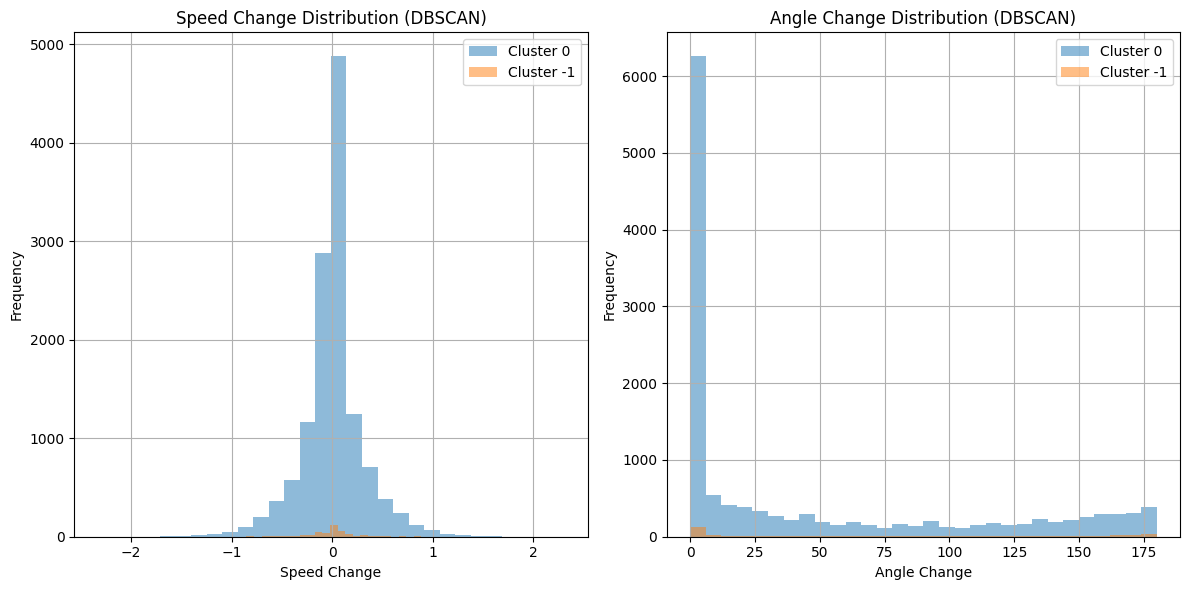

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the distribution of velocity changes and direction changes
plt.figure(figsize=(12, 6))

# Plotting the distribution of velocity changes
plt.subplot(1, 2, 1)
dbscan_results[dbscan_results['Cluster'] == 0]['SpeedChange'].hist(alpha=0.5, bins=30, label='Cluster 0')
dbscan_results[dbscan_results['Cluster'] == -1]['SpeedChange'].hist(alpha=0.5, bins=30, label='Cluster -1')
plt.title('Speed Change Distribution (DBSCAN)')
plt.xlabel('Speed Change')
plt.ylabel('Frequency')
plt.legend()

# Plotting the distribution of changes in direction
plt.subplot(1, 2, 2)
dbscan_results[dbscan_results['Cluster'] == 0]['AngleChange'].hist(alpha=0.5, bins=30, label='Cluster 0')
dbscan_results[dbscan_results['Cluster'] == -1]['AngleChange'].hist(alpha=0.5, bins=30, label='Cluster -1')
plt.title('Angle Change Distribution (DBSCAN)')
plt.xlabel('Angle Change')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/I

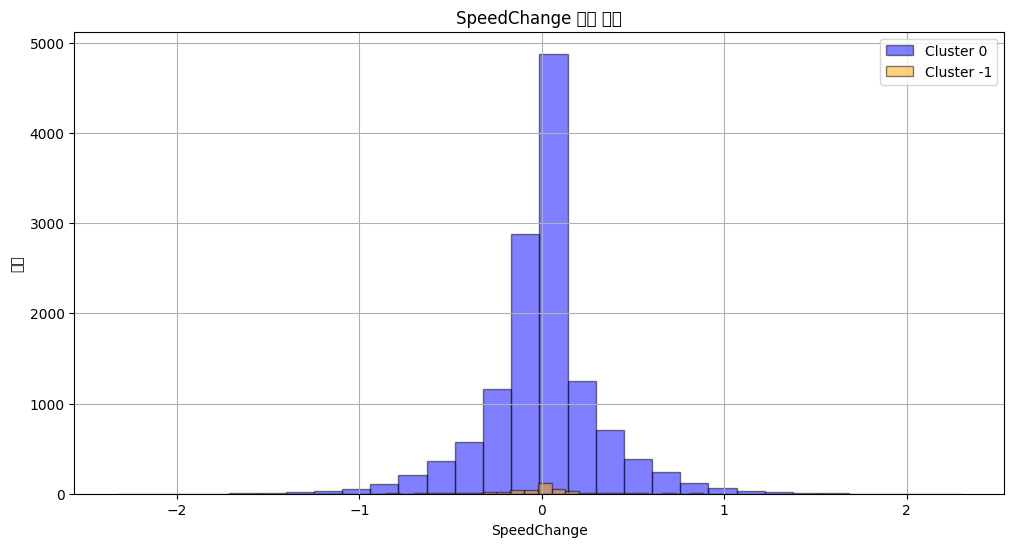

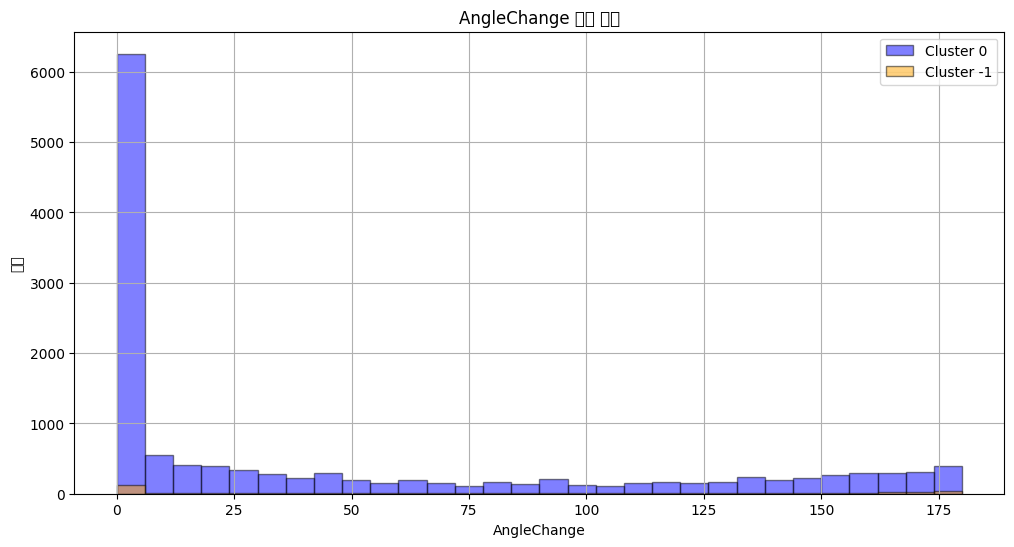

In [12]:
def plot_comparison(cluster_0, cluster_1, column, title):
    plt.figure(figsize=(12, 6))
    
    # Plotting the Distribution of Cluster 0
    plt.hist(cluster_0[column], bins=30, alpha=0.5, label='Cluster 0', color='blue', edgecolor='black')
    
    # Plotting the Distribution of Cluster -1
    plt.hist(cluster_1[column], bins=30, alpha=0.5, label='Cluster -1', color='orange', edgecolor='black')
    
    plt.title(f'{title} 对比')
    plt.xlabel(column)
    plt.ylabel('频率')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Compare the distribution of SpeedChange
plot_comparison(cluster_0, cluster_1, 'SpeedChange', 'SpeedChange 分布')

# Compare the distribution of AngleChange
plot_comparison(cluster_0, cluster_1, 'AngleChange', 'AngleChange 分布')

In [13]:
# Calculate the number and proportion of noise points
num_noise_points = dbscan_results[dbscan_results['Cluster'] == -1].shape[0]
total_points = dbscan_results.shape[0]
noise_ratio = num_noise_points / total_points

print(f'噪声点数量: {num_noise_points}')
print(f'噪声点占比: {noise_ratio:.2%}')


噪声点数量: 429
噪声点占比: 3.16%


In [14]:
# pick up noise points
noise_points = dbscan_results[dbscan_results['Cluster'] == -1]

# Calculate the statistical characteristics of the noise points
noise_stats = noise_points[['SpeedChange', 'AngleChange', 'Speed']].describe()
print(noise_stats)


       SpeedChange  AngleChange       Speed
count   429.000000   429.000000  429.000000
mean      0.001248    74.726726    0.203533
std       0.272413    69.250946    0.214072
min      -1.231500     0.000000    0.000000
25%      -0.113137     0.000000    0.044721
50%       0.000000    56.309932    0.140021
75%       0.104529   150.989640    0.285171
max       1.036567   180.000000    1.259728


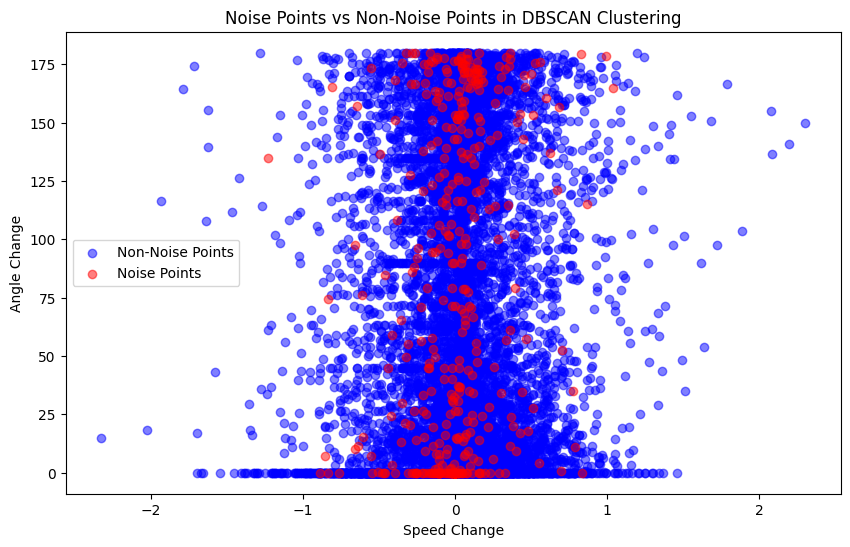

In [15]:
import matplotlib.pyplot as plt

# Extraction of non-noise points
non_noise_points = dbscan_results[dbscan_results['Cluster'] != -1]

# Plotting the distribution of noise and non-noise points
plt.figure(figsize=(10, 6))
plt.scatter(non_noise_points['SpeedChange'], non_noise_points['AngleChange'], c='blue', label='Non-Noise Points', alpha=0.5)
plt.scatter(noise_points['SpeedChange'], noise_points['AngleChange'], c='red', label='Noise Points', alpha=0.5)
plt.xlabel('Speed Change')
plt.ylabel('Angle Change')
plt.title('Noise Points vs Non-Noise Points in DBSCAN Clustering')
plt.legend()
plt.show()
